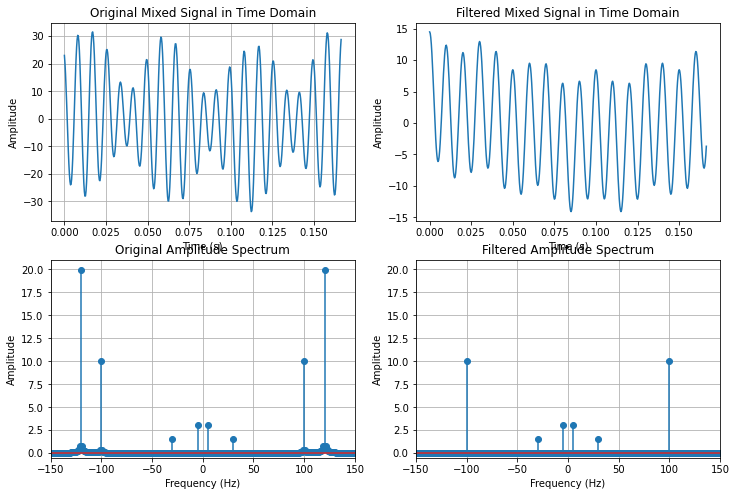

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math
def getSin(amp, freq, phase, sampleList):
    return amp * np.sin(-2 * math.pi * freq * sampleList + phase)

def getCos(amp, freq, phase, sampleList):
    return amp * np.cos(-2 * math.pi * freq * sampleList + phase)


def denoise(arr, thresh):
    mask = arr > thresh
    return mask * arr


srate = 3000
t = np.linspace(0, 1, srate)

s1 = getSin(amp=1.5, freq=30, phase=0, sampleList=t)
s2 = getCos(amp=3, freq=5, phase=0, sampleList=t)
s3 = getSin(amp=10, freq=100, phase=0, sampleList=t)
s4 = getCos(amp=20, freq=120, phase=0, sampleList=t)

mixed_signal = s1 + s2 + s3 + s4

fCoefs = np.fft.fft(mixed_signal, srate)
amp_list = 2 * np.abs(fCoefs / srate)

freqs = np.fft.fftfreq(len(amp_list), 1/srate)
amp_shifted = np.fft.fftshift(amp_list)
freq_shift = np.fft.fftshift(freqs)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# 左上图：生成原始未过滤数据的复合波形时域图
ax[0, 0].plot(t[:500], mixed_signal[:500])
ax[0, 0].set_title("Original Mixed Signal in Time Domain")
ax[0, 0].set_xlabel("Time (s)")
ax[0, 0].set_ylabel("Amplitude")
ax[0, 0].grid()

# 右上图：空白，稍后添加双重过滤后的混合波形时域图
ax[0, 1].set_title("Filtered Mixed Signal in Time Domain")
ax[0, 1].set_xlabel("Time (s)")
ax[0, 1].set_ylabel("Amplitude")
ax[0, 1].grid()

# 左下图：原始振幅频谱
ax[1, 0].stem(freq_shift, amp_shifted)
ax[1, 0].set_xlim([-150, 150])
ax[1, 0].set_ylim([-0.5, 21])
ax[1, 0].set_title("Original Amplitude Spectrum")
ax[1, 0].set_xlabel("Frequency (Hz)")
ax[1, 0].set_ylabel("Amplitude")
ax[1, 0].grid()

# 对振幅频谱进行去噪处理
amp_shifted[(freq_shift > 110) | (freq_shift < -110)] = 0
amp_shifted = denoise(amp_shifted, 1)

# 右下图：处理后的振幅频谱
ax[1, 1].stem(freq_shift, amp_shifted)
ax[1, 1].set_xlim([-150, 150])
ax[1, 1].set_ylim([-0.5, 21])
ax[1, 1].set_title("Filtered Amplitude Spectrum")
ax[1, 1].set_xlabel("Frequency (Hz)")
ax[1, 1].set_ylabel("Amplitude")
ax[1, 1].grid()

#逆FFT变换得到双重过滤后的混合波形时域信号

amp_shifted_unshifted = np.fft.ifftshift(amp_shifted)
filtered_fCoefs = amp_shifted_unshifted * srate / 2
filtered_signal = np.fft.ifft(filtered_fCoefs)

# 右上图：双重过滤后的混合波形时域图
ax[0, 1].plot(t[:500], filtered_signal.real[:500])
ax[0, 1].grid()
plt.show()



In [6]:
!pip install opencv-python

     |████████████████████████████████| 61.8 MB 256 kB/s            
